<a href="https://colab.research.google.com/github/salmankhaliq22/MachineLearning-Templates/blob/main/RFE_for_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RFE for Regression

- Here we are using data from sklearn.datasets and would be using diabetes dataset for regression models, you can check out the details in the [link](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes)

In [22]:
# test regression dataset
from sklearn.datasets import load_diabetes

# define dataset
X, y = load_diabetes(return_X_y = True, as_frame = True)

# summarize the dataset
print(X.shape, y.shape)

(442, 10) (442,)


In [23]:
# Lets look at the head of the X variable , which contains the features
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [24]:
# Lets do the same for the target variable
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [25]:
# evaluate RFE for Regression
import numpy as np
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
# this ignores the depreciation warnings etc
import warnings
warnings.filterwarnings("ignore")

# create pipeline
rfe = RFE(estimator = DecisionTreeRegressor(), n_features_to_select = 4)
model = DecisionTreeRegressor()
pipeline = make_pipeline(rfe, model)

# evaluate model
cv = RepeatedStratifiedKFold(n_splits = 4, n_repeats = 3, random_state = 22)
n_scores = cross_val_score(pipeline, X, y, scoring = 'neg_mean_absolute_error', cv=cv, n_jobs=-1)

# report performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: -64.846 (4.843)


In [31]:
# evaluate RFE for Regression
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
# this ignores the depreciation warnings etc
import warnings
warnings.filterwarnings("ignore")

# Create the RFE object and compute a cross-validated score.
min_features_to_select = 1  # Minimum number of features to consider
cv = RepeatedStratifiedKFold(n_splits = 4, n_repeats = 10, random_state = 22)
rfecv = RFECV(estimator = DecisionTreeRegressor(), step = 1, cv = cv, scoring = 'neg_mean_absolute_error', min_features_to_select = min_features_to_select)
rfecv.fit(X, y)
# model = DecisionTreeRegressor()
# pipeline = make_pipeline(rfe, model)

# evaluate model
# cv = RepeatedStratifiedKFold(n_splits = 4, n_repeats = 3, random_state = 22)
# n_scores = cross_val_score(pipeline, X, y, scoring = 'neg_mean_absolute_error', cv=cv, n_jobs=-1)

# report performance
print("Optimal number of features : %d" % rfecv.n_features_)
# print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Optimal number of features : 2


In [32]:
# summarize the selection of the attributes
print(rfecv.support_)

[False False  True False False False False False  True False]


In [33]:
# summarize the ranking of the attributes
fea_rank_ = pd.DataFrame({'cols':X.columns, 'fea_rank':rfecv.ranking_})
fea_rank_.loc[fea_rank_.fea_rank > 0].sort_values(by=['fea_rank'], ascending = True)

,cols,fea_rank
2,bmi,1
8,s5,1
4,s1,2
9,s6,3
3,bp,4
6,s3,5
5,s2,6
0,age,7
7,s4,8
1,sex,9


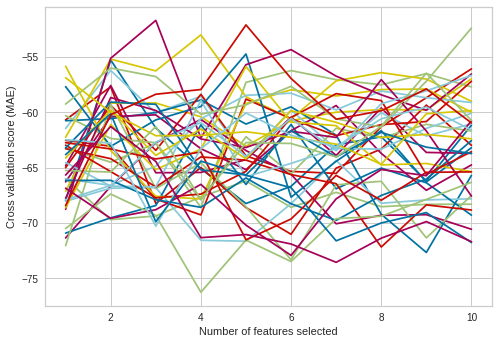

In [34]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (MAE)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
# plt.legend()
plt.show()

[Reference](https://www.scikit-yb.org/en/latest/api/model_selection/rfecv.html)

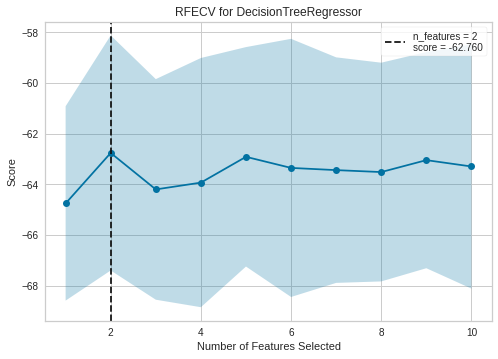

In [37]:
from yellowbrick.model_selection import RFECV

# Instantiate RFECV visualizer with a DecisionTreeRegressor
min_features_to_select = 1
cv = RepeatedStratifiedKFold(n_splits = 4, n_repeats = 10, random_state = 22)
rfecv = RFECV(estimator = DecisionTreeRegressor(), step = 1, cv = cv, scoring = 'neg_mean_absolute_error', min_features_to_select = min_features_to_select)
visualizer = rfecv

# print("Optimal number of features : %d" % rfecv.n_features_)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure
plt.show()